
# BMI.csv 100개 사용 height와 weight사용 분류

In [45]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns

data = pd.read_csv('bmi.csv') #, sep=',')
data1 = data.head(100)

In [46]:
data1

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
95,136,51,fat
96,131,37,normal
97,180,75,normal
98,191,60,thin


In [47]:
# X = data1[['height', 'weight']]
# y = data1[['label']]
df = data1.iloc[:100, :-1]
df

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


c:\ai_source\machinelearning\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


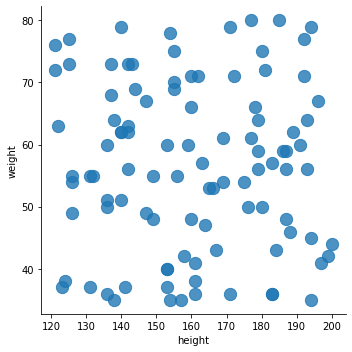

In [48]:
sns.lmplot('height', 'weight', data=df, fit_reg=False, scatter_kws={"s": 150})

In [49]:
data_points = df.values
#data_points



array([[142,  62],
       [142,  73],
       [177,  61],
       [187,  48],
       [153,  60],
       [186,  59],
       [166,  53],
       [193,  56],
       [184,  43],
       [193,  64],
       [155,  69],
       [142,  63],
       [181,  72],
       [189,  62],
       [140,  62],
       [153,  37],
       [131,  55],
       [137,  68],
       [153,  40],
       [136,  50],
       [125,  73],
       [192,  71],
       [147,  49],
       [161,  36],
       [172,  71],
       [143,  73],
       [187,  56],
       [140,  51],
       [121,  72],
       [183,  36],
       [163,  57],
       [160,  48],
       [124,  38],
       [176,  50],
       [197,  41],
       [140,  79],
       [158,  42],
       [132,  55],
       [126,  49],
       [136,  36],
       [175,  54],
       [196,  67],
       [138,  64],
       [123,  37],
       [194,  35],
       [169,  54],
       [149,  55],
       [194,  45],
       [156,  55],
       [164,  47],
       [179,  56],
       [185,  80],
       [183,

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random').fit(data_points)


In [53]:
kmeans.cluster_centers_

array([[152.14285714,  43.53571429],
       [139.73529412,  65.32352941],
       [184.71052632,  58.28947368]])

In [54]:
kmeans.labels_

array([1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1])

In [55]:
df['cluster_id'] = kmeans.labels_
df

c:\ai_source\machinelearning\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


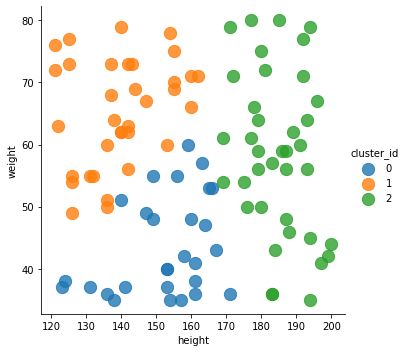

In [57]:
sns.lmplot('height', 'weight', data=df, fit_reg=False, scatter_kws={"s":150}, hue='cluster_id')

# my work

In [ ]:
X = data1[['height', 'weight']]
#y = data1[['label']]


In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random').fit(X)


KMeans(init='random', n_clusters=3)

In [22]:
model.cluster_centers_ # 각 클러스터의 중심값


array([[152.14285714,  43.53571429],
       [184.71052632,  58.28947368],
       [139.73529412,  65.32352941]])

In [23]:
#model.labels_

pred = model.predict(X) # 데이터가 속하는 클러스터 예측
pred


array([2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2])

In [25]:
data2 = X
data2['cluster_id'] = pred

In [26]:
data2

,height,weight,cluster_id
0,142,62,2
1,142,73,2
2,177,61,1
3,187,48,1
4,153,60,2
...,...,...,...
95,136,51,2
96,131,37,0
97,180,75,1
98,191,60,1


In [32]:
data1['cluster_id'] = pred
data1.head(50)

c:\ai_source\machinelearning\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,height,weight,label,cluster_id
0,142,62,fat,2
1,142,73,fat,2
2,177,61,normal,1
3,187,48,thin,1
4,153,60,fat,2
5,186,59,thin,1
6,166,53,normal,0
7,193,56,thin,1
8,184,43,thin,1
9,193,64,thin,1


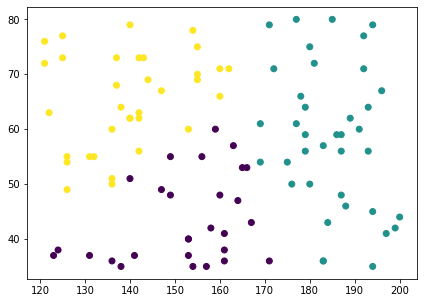

In [41]:
plt.figure(figsize=(7, 5))
#plt.scatter(data1.iloc[:, 0], data1.iloc[:, 3])
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=data1.iloc[:, 3])